# Système conservatif : Effets non linéaires.

__But :__  résoudre numériquement une équation différentielle du deuxième ordre non-linéaire et faire apparaître l’effet des termes non-linéaires.

## Position du problème
Nous allons chercher à résoudre numériquement l'équation d'évolution traduisant la vibration d'une molécule HCl. La différence de masse des deux atomes permet de supposer que l'atome de chlore est immobile. On travaillera donc dans son référentiel qu'on supposera galiléen. On suppose le mouvement de l'atome d'hydrogène rectiligne suivant un axe Ox (O étant la position du chlore)

Le système HCl est supposé isolé. On suppose que l'interaction intramoléculaire est modélisée par l'énergie potentielle :

$$
E_p = {C \over r^n} - \alpha {e^2 \over 4\pi \epsilon_0 r}
$$

avec : $C = 2.2 \times 10^{-138} J.m^{12}; \alpha = 0.40; n = 12; \epsilon_0 = 8.85 \times 10^{-12} SI; e=1.6\times 10^{-19}C$

et la masse de l'hydrogène : $m_H = 1.0 \times 10^{-27} kg$.

Pour éviter de traiter des puissances trop importantes, on va changer les unités d'étude : la __masse__ sera en _unité de masse atomique_, les __distances__ en _Angstrom_, les __charges__ en nombre de fois _la charge élémentaire_ et  les __temps__ en _femtosecondes_. Les constantes précédentes prennent alors les valeurs suivantes (UA = Unité arbitraire):

$C = 2.2 \times 10^{-1} (UA); \alpha = 0.40; n = 12; \epsilon_0 = 3.45 \times 10^{-1} (UA); e=1 (UA); m_H = 1 (UA)$

### Etude de l'énergie potentielle.

Vous devez :
1. Ecrire une fonction `Ep` qui prend comme argument une distance `r` et qui renvoie l'énergie potentielle associée. _Il est conseillé d'enregistrer les variables C, alpha... comme des variables globales._
2. Ecrire une fonction `force` qui prend comme argument une valeur `x` et `pas` et qui renvoie la valeur de la force : $F = - \frac{dE_p}{dr}$ estimée en `x` par dérivation numérique en utilisant le pas `pas`.
3. Tracer $E_p(r)$^et $F(r)$ pour $r$ entre 1 et 10 Angstrom.
3. Déterminer, par une recherche de 0 par dichotomie, la distance `rE` correspondant à la position d'équilibre de la molécule avec une tolérance de $10^{-14} m$.

__Pensez à bien utiliser la notation scientifique 4e-12 pour entrer la valeur numérique $4\times 10^{-12}$.__

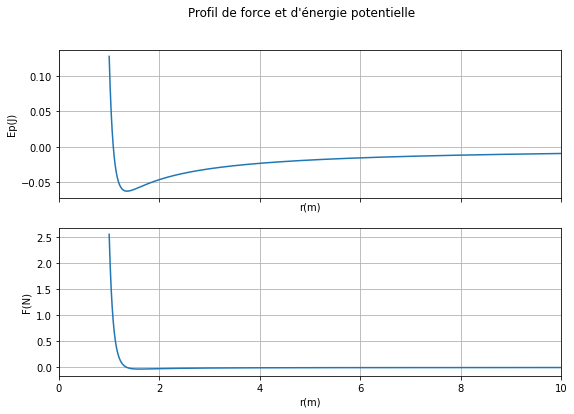

1.356475830078125


In [1]:
"""
N'oubliez pas les bibliothèques scientifiques 
et pensez à commenter votre code.
"""
import numpy as np
import matplotlib.pyplot as plt

"""Définition des constantes"""
C = 2.2e-1
alpha = 0.4
n = 12
epsilon0 = 3.45e-1
e = 1
m = 1

def Ep(r):
    """Fonction renvoyant l'énergie potentielle à une distance r"""
    return C / r ** n - alpha * e ** 2 / (4 * np.pi * epsilon0 * r)

def force(x, pas):
    """Fonction qui calcul les valeurs de dérivées pour un vecteur de valeurs avec un pas de dérivation."""
    return - (Ep(x + pas) - Ep(x - pas)) / (2 * pas)  # On prend l'opposé

"""
Tracé graphique
"""
rpas = 1e-2
rt = np.arange(1, 10, rpas)
Ept = Ep(rt)
forcet = force(rt, rpas)

f, ax = plt.subplots(2, 1, figsize=(9, 6), sharex='col')
f.suptitle("Profil de force et d'énergie potentielle")
"""Energie potentielle"""
ax[0].set_xlabel('r(m)')
ax[0].set_xlim(0, 10)  # Pour forcer les valeurs limites des abscisses
ax[0].set_ylabel('Ep(J)')
ax[0].plot(rt, Ept)
ax[0].grid()

ax[1].set_xlabel('r(m)')
ax[1].set_ylabel('F(N)')
ax[1].plot(rt, forcet)
ax[1].grid()

plt.show()


"""
Détermination de la position d'équilibre : zéro de la force.
On doit choisir un pas inférieur à 10^-14 pour le calcul de la dérivée
Le tracé graphique montre qu'on peut directement chercher entre 0 et 2e-10 m.
"""    
def dicho(f, rmin, rmax, tol, pas):
    mid = (rmax + rmin) / 2
    if (rmax - rmin) < tol:
        return mid
    elif f(mid, pas) == 0:
        return mid
    elif f(rmin, pas) * f(mid, pas) < 0:
        return dicho(f, rmin, mid, tol, pas)
    elif f(rmax, pas) * f(mid, pas) < 0:
        return dicho(f, mid, rmax, tol, pas)
    else:
        print("La fonction ne s'annule pas !")

re = dicho(force, 0, 2, 1e-4, 1e-6)
print(re)

## Schéma d'Euler pour un équation d'ordre 2

On rappelle le principe, on utilise deux fonctions inconnues :

$$
\begin{pmatrix}
x(t)\\
v(t)
\end{pmatrix}
$$

On a alors la relation :

$$
{\rm{d} \over \rm{dt}}
\begin{pmatrix}
x(t)\\
v(t)
\end{pmatrix}
=
\begin{pmatrix}
v(t)\\
{\sum F_{ext}(t, x, v) \over m} = f(t, x, v)
\end{pmatrix}
$$

On peut alors implémenter le schéma d'Euler explicite sur le vecteur précédent :

$$
\begin{pmatrix}
x_{k+1}\\
v_{k+1}
\end{pmatrix}
=
\begin{pmatrix}
x_{k} + h \times v_k\\
v_k + h \times f(t, x, v)
\end{pmatrix}
$$

où $h$ est le pas d'intégration.

1. Préciser l'expression de $f(t, x, v)$ pour notre système et définir une fonction `f_euler(t, x, v)` qui renvoie cette expression.
2. Définir une fonction `euler` qui prend pour argument : 
    * `f` : la fonction du schéma d'Euler
    * `h` : le pas d'intégration choisi
    * `x0` et `v0` : les conditions initiales sur la position et la vitesse au temps initial $t=0$
    * `tf` : le temps final pour l'intégration.
 
    et qui renvoie trois vecteurs :  
    * `tk` les temps où on calcule les positions vitesses
    * `xk` les positions $x(t_k)$
    * `vk` les vitesses $v(t_k)$
3. Vous pouvez tester votre fonction sur une chute libre ($f(t, x, v) = g = 10$) avec un faible nombre de points.

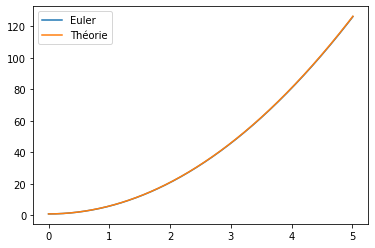

In [2]:
"""
Pensez à réutiliser les fonctions déjà définies.
"""
pas = 1e-4  # pas pour le calcul de la force
lambd = 1e-10

def f_hcl(t, x, v):
    return force(x, pas) / m - lambd * v

def euler2(f, h, x0, v0, tf):
    tk = [0]  # On va travailler avec des listes (taille variable). On pourrait aussi prévoir la taille du vecteur.
    xk = [x0]
    vk = [v0]
    while tk[-1] < tf:
        oldv = vk[-1]
        oldx = xk[-1]
        oldt = tk[-1]
        a = f(oldt, oldx, oldv)
        vk.append(oldv + h * a)  # Ajout de la nouvelle vitesse
        xk.append(oldx + h * oldv)  # Ajout de la nouvelle position
        tk.append(oldt + h)  # Avancée d'un pas de temps
    return np.array(tk), np.array(xk), np.array(vk)

"""Comparaison avec un modèle connu"""
g = 10
def chute_libre(t, x, v):
    return g


test_e = euler2(chute_libre, 0.01, 1, 0, 5)
xg = 1 + g / 2 * test_e[0] ** 2  # Valeur théorique
f, ax = plt.subplots()  # On compare la position implémentée et la position théorique
ax.plot(test_e[0], test_e[1], label="Euler")
ax.plot(test_e[0], xg, label="Théorie")
ax.legend()
plt.show()

## Application à l'étude de la vibration

### Effets de non linéarité
Le but est d'observer les vibrations de la molécule autour de sa position d'équilibre pour :
* une vibration de très faible amplitude : $(r - r_E) < 0.01 r_E$
* une vibration plus importante : $(r - r_E) < 0.2 r_E$

On cherchera à observer par les tracés temporelles et le portrait de phase si l'approximation linéaire de l'équation pourrait être valable et quelle sont les effets de non linéarité.

Vous devez :
1. Définir une fonction `Ec(v)` qui renvoient l'énergie cinétique du système pour une vitesse donnée.
2. Utiliser votre implémentation du schéma d'Euler pour obtenir les temps $t_k$, positions $x(t_k)$ et vitesses $v(t_k)$ pour les deux cas étudiées puis les énergies potentielles $E_p(t_k)$, énergie cinétique $E_c(t_k)$ et énergie mécanique $E_m(t_k)$ aux temps $t_k$.
3. Tracer alors une fenêtre avec 4 graphiques : l'un donnant $x(t)$, le second $v(t)$, le troisième le portrait de phase et le quatrième l'évolution des 3 termes énergétiques.
4. Observer l'influence du pas d'intégration et l'adapter pour une intégration correcte.
4. Observer si ces évolutions sont cohérentes avec l'approximation linéaire et sinon quelles sont les différences.

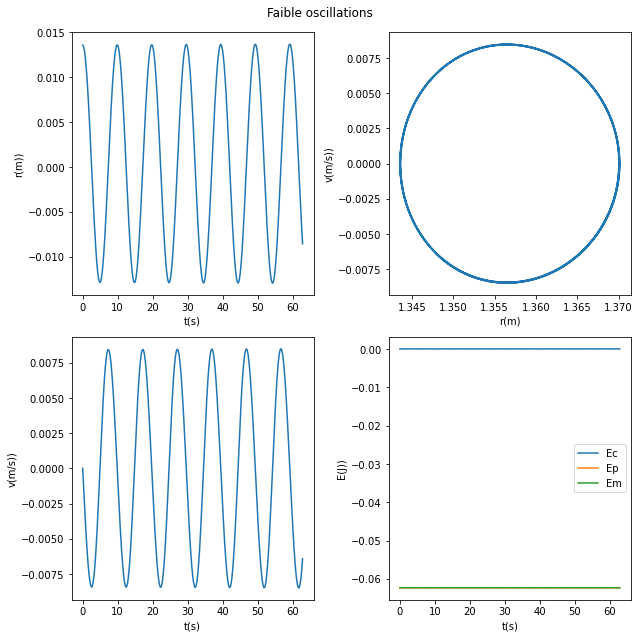

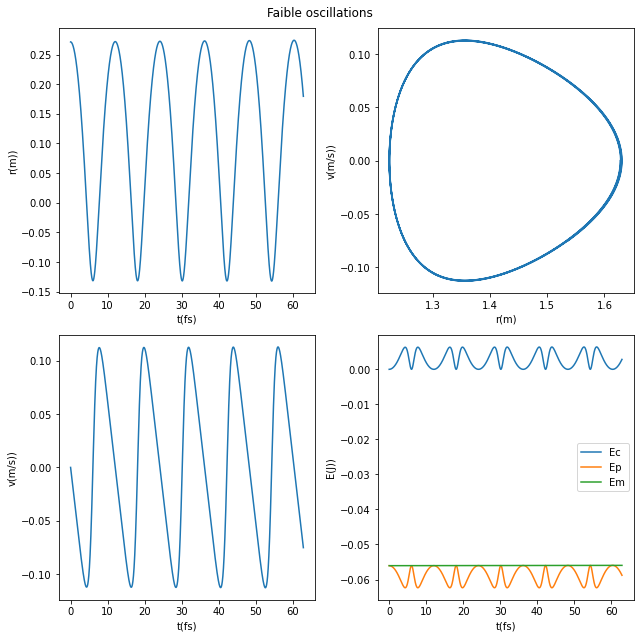

In [3]:
def Ec(v):
    return 1 / 2 * m *v ** 2

def Em(x, v):
    return Ep(x) + Ec(v)

"""Test pour une faible amplitude. On part sans vitesse initiale de l'amplitude donnée"""
v0 = 0
r0 = re + 0.01 * re

"""Choix du temps final
La pulsation propre est de l'ordre de 10^-14 donc on va prendre plusieurs périodes propres
"""
w0 = 1
T0 = 2 * np.pi / w0
tf = 10 * T0
h = tf / 1e5  # On aura donc 1000000 de points

tfaible, xfaible, vfaible = euler2(f_hcl, h, r0, v0, tf)
Ecfaible = Ec(vfaible)
Epfaible = Ep(xfaible)
Emfaible = Ecfaible + Epfaible  # Plus direct

"""Tracé graphique"""
f, ax = plt.subplots(2, 2, figsize=(9, 9))
f.suptitle("Faible oscillations")

"""Position"""
ax[0, 0].set_xlabel('t(s)')
ax[0, 0].set_ylabel('r(m))')
ax[0, 0].plot(tfaible, xfaible - re)

"""Vitesse"""
ax[1, 0].set_xlabel('t(s)')
ax[1, 0].set_ylabel('v(m/s))')
ax[1, 0].plot(tfaible, vfaible)

"""Position"""
ax[0, 1].set_xlabel('r(m)')
ax[0, 1].set_ylabel('v(m/s))')
ax[0, 1].plot(xfaible, vfaible)

"""Position"""
ax[1, 1].set_xlabel('t(s)')
ax[1, 1].set_ylabel('E(J))')
ax[1, 1].plot(tfaible, Ecfaible, label='Ec')
ax[1, 1].plot(tfaible, Epfaible, label='Ep')
ax[1, 1].plot(tfaible, Emfaible, label='Em')
ax[1, 1].legend()

f.tight_layout()
plt.show()


"""Test pour une forte amplitude. On part sans vitesse initiale de l'amplitude donnée"""
v0 = 0
r0 = re + 0.2 * re

"""Choix du temps final
La pulsation propre est de l'ordre de 10^-14 donc on va prendre plusieurs périodes propres
"""
w0 = 1
T0 = 2 * np.pi / w0
tf = 10 * T0
h = tf / 1e5  # On aura donc 1000000 de points

tfort, xfort, vfort = euler2(f_hcl, h, r0, v0, tf)
Ecfort = Ec(vfort)
Epfort = Ep(xfort)
Emfort = Ecfort + Epfort  # Plus direct

"""Tracé graphique"""
f, ax = plt.subplots(2, 2, figsize=(9, 9))
f.suptitle("Faible oscillations")

"""Position"""
ax[0, 0].set_xlabel('t(fs)')
ax[0, 0].set_ylabel('r(m))')
ax[0, 0].plot(tfort, xfort - re)

"""Vitesse"""
ax[1, 0].set_xlabel('t(fs)')
ax[1, 0].set_ylabel('v(m/s))')
ax[1, 0].plot(tfort, vfort)

"""Position"""
ax[0, 1].set_xlabel('r(m)')
ax[0, 1].set_ylabel('v(m/s))')
ax[0, 1].plot(xfort, vfort)

"""Position"""
ax[1, 1].set_xlabel('t(fs)')
ax[1, 1].set_ylabel('E(J))')
ax[1, 1].plot(tfort, Ecfort, label='Ec')
ax[1, 1].plot(tfort, Epfort, label='Ep')
ax[1, 1].plot(tfort, Emfort, label='Em')
ax[1, 1].legend()

f.tight_layout()
plt.show()

__Observations :__
* Le pas d'intégration est critique, pour un pas trop faible, l'évolution n'est pas correct, on observe notamment un dérive énergétique alors que le système est conservatif.
* On observe un comportement proche d'un oscillateur harmonique aux faibles amplitudes et un comportement qui dévie du modèle harmonique aux fortement amplitudes.
* On remarque que dans le cas non linéaire, l'énergie mécanique fluctue alors qu'elle devrait être constante. C'est un problème lié à l'intégration numérique. Il faudrait sans doute encore augmenter le pas (mais ça coûte beaucoup de temps). De plus le schéma d'Euler explicite pose le problème de la non conservation de l'énergie mécanique, même pour des systèmes conservatifs. Pour étudier de tels systèmes plus précisément, on utilise souvent d'autres schéma d'intégration qui ont la particularité de conserver l'énergie (_algorithmes symplectiques_)

### Fonctions de la bibliothéque scipy
Nous allons utiliser la fonction `odeint` de la bibliothèque `scipy.integrate`. Sa signature est :

```
scipy.integrate.odeint(func, y0, t, tfirst=True)
```

* `func` : fonction qui renvoie le vecteur :
$$\begin{pmatrix}
v_k\\
f(t, x, v)
\end{pmatrix}
$$
Plus généralement, on utiliser la représentation matricielle :
$$
\begin{pmatrix}
Y_{k+1} = Y_k + h * F(t, x, v)
\end{pmatrix}
$$
avec 
$$
Y_k = \begin{pmatrix}
x_k\\
v_k
\end{pmatrix}
et $F$ une fonction qui renvoie un vecteur (deux valeurs). Ici le vecteur donné précédemment.
* `y0` est un __vecteur__ donnant les conditions initiales.
* `t` est le vecteur pour lequels les valeurs de $Y_k$ (positions et vitesses) seront calculées. (`t` doit être ordonné).

Elle renvoie un tableau où chaque colonne est les estimations des fonctions à intégrer (ici x et v).

__Précision sur le vecteur `t` et le pas d'intégration.__  
Vous remarquerez qu'on ne donne pas de pas d'intégration. Le vecteur `t` ne fait pas office de pas d'intégration. Les valeurs de position et vitesse à ces temps seront calculées ensuite par interpolation.

C'est la fonction odeint elle-même qui va déterminer le pas d'intégration par comparaison d'erreurs entre plusieurs méthodes. Elles peut fait varier ce pas d'intégration au cours du calcul : on dit que c'est une méthode à __pas variable.__ On peut régler la tolérance sur l'erreur avec des arguments optionnels non présentés ici.

Ce pas pouvant varier et quelles fois être grand, il est préférable de donner explicitement un vecteur avec des valeurs temps pour calculer les positions et vitesses a posteriori.

1. A vous de comprendre et utiliser la fonction précédente pour réaliser l'intégration du problème et étudier les vibration de la molécule.

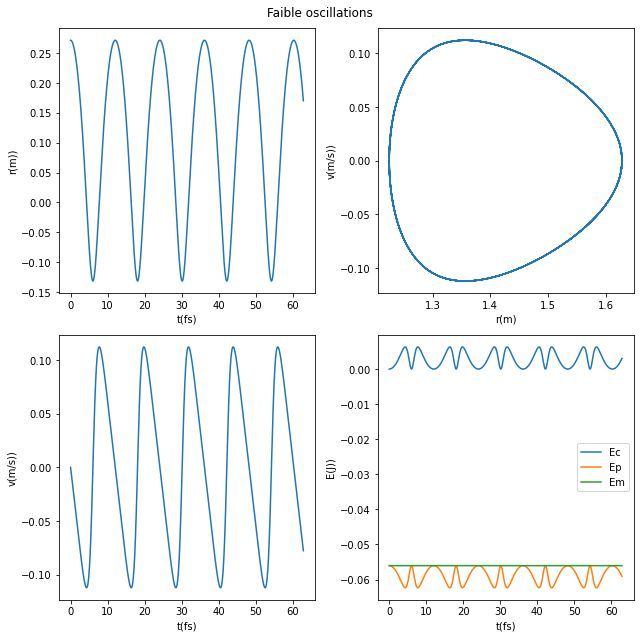

In [4]:
def f_hcl2(t, x):
    return [x[1], force(x[0], pas)/ m]

from scipy.integrate import odeint

r0 = re + 0.2 * re
todeint = np.arange(0, 10*T0, T0 / 1e5)
yy = odeint(f_hcl2, [r0, 0], todeint, tfirst=True)

"""yy contient deux colonnes : position et vitesse aux temps de todeint"""
xodeint = yy[:, 0]
vodeint = yy[:, 1]

Ecodeint = Ec(vodeint)
Epodeint = Ep(xodeint)
Emodeint = Ecodeint + Epodeint  # Plus direct

"""Tracé graphique"""
f, ax = plt.subplots(2, 2, figsize=(9, 9))
f.suptitle("Faible oscillations")

"""Position"""
ax[0, 0].set_xlabel('t(fs)')
ax[0, 0].set_ylabel('r(m))')
ax[0, 0].plot(todeint, xodeint - re)

"""Vitesse"""
ax[1, 0].set_xlabel('t(fs)')
ax[1, 0].set_ylabel('v(m/s))')
ax[1, 0].plot(todeint, vodeint)

"""Position"""
ax[0, 1].set_xlabel('r(m)')
ax[0, 1].set_ylabel('v(m/s))')
ax[0, 1].plot(xodeint, vodeint)

"""Position"""
ax[1, 1].set_xlabel('t(fs)')
ax[1, 1].set_ylabel('E(J))')
ax[1, 1].plot(todeint, Ecodeint, label='Ec')
ax[1, 1].plot(todeint, Epodeint, label='Ep')
ax[1, 1].plot(todeint, Emodeint, label='Em')
ax[1, 1].legend()

f.tight_layout()
plt.show()

In [5]:
print(Ep(1))

0.12773626487426354


On remarque que l'énergie potentielle pour 1 Angstrom est positive, ce qui place l'hydrogène dans un état de diffusion (Ep potentielle nulle à l'infini et pas d'autre barrière d'énergie potentielle). 

__On va donc placer l'hydrogène dans un état $r0 = 1 \mathring{A}$ et $v0 = 0$.__

L'énergie mécanique étant conservée et $Ep(+\infty) = 0$, _il vient que l'énergie cinétique finale devrait être égale à l'énergie potentielle initiale (où $Ec = 0$)._

On va réaliser une intégration avec `odeint` pour bénéficier du pas qui va s'adapter à l'intégration. On va étudier le système sur un temps relativement long pour considérer qu'on est proche de l'infini et on va tracer les 4 graphiques comme précédemment.

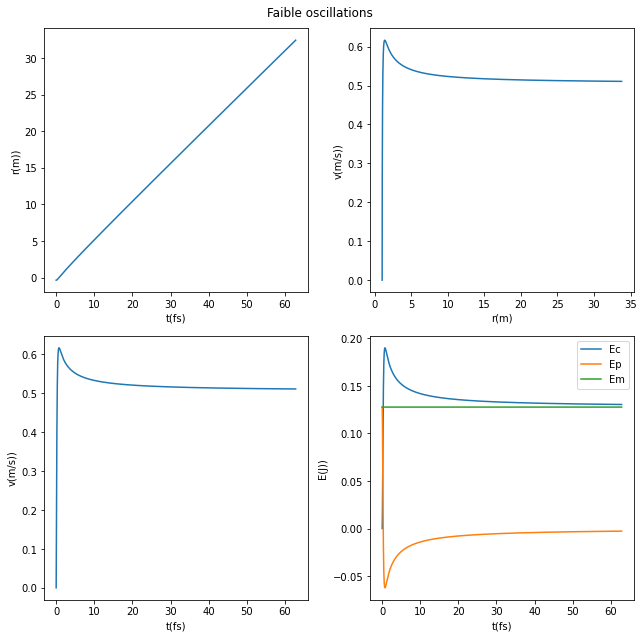

In [6]:
r0 = 1
todeint = np.arange(0, 10*T0, T0 / 1e5)
yy = odeint(f_hcl2, [r0, 0], todeint, tfirst=True)

"""yy contient deux colonnes : position et vitesse aux temps de todeint"""
xodeint = yy[:, 0]
vodeint = yy[:, 1]

Ecodeint = Ec(vodeint)
Epodeint = Ep(xodeint)
Emodeint = Ecodeint + Epodeint  # Plus direct

"""Tracé graphique"""
f, ax = plt.subplots(2, 2, figsize=(9, 9))
f.suptitle("Faible oscillations")

"""Position"""
ax[0, 0].set_xlabel('t(fs)')
ax[0, 0].set_ylabel('r(m))')
ax[0, 0].plot(todeint, xodeint - re)

"""Vitesse"""
ax[1, 0].set_xlabel('t(fs)')
ax[1, 0].set_ylabel('v(m/s))')
ax[1, 0].plot(todeint, vodeint)

"""Position"""
ax[0, 1].set_xlabel('r(m)')
ax[0, 1].set_ylabel('v(m/s))')
ax[0, 1].plot(xodeint, vodeint)

"""Position"""
ax[1, 1].set_xlabel('t(fs)')
ax[1, 1].set_ylabel('E(J))')
ax[1, 1].plot(todeint, Ecodeint, label='Ec')
ax[1, 1].plot(todeint, Epodeint, label='Ep')
ax[1, 1].plot(todeint, Emodeint, label='Em')
ax[1, 1].legend()

f.tight_layout()
plt.show()

On observe que l'énergie cinétique se rapproche bien de l'énergie mécanique comme attendu.